In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:00<00:00, 177MB/s]
100% 149M/149M [00:00<00:00, 161MB/s]


In [ ]:
def get_class_paths(path):
    classes=[]
    class_paths=[]

    #iterate through directories in the training path
    for label in os.listdir(path):
        label_path=os.path.join(path,label)

        #Check if it is a directory
        if os.path.isdir(label_path):
          #iterate through images in the label directory
          for image in os.listdir(label_path):
              image_path=os.path.join(label_path,image)

              #Add class and path to respective lists
              classes.append(label)
              class_paths.append(image_path)

    #Create a dataframe with the collected data
    df=pd.DataFrame({
        'Class Path':class_paths,
        'Class':classes
    })

    return df


In [ ]:
tr_df=get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1266.jpg,notumor
1,/content/Training/notumor/Tr-no_1198.jpg,notumor
2,/content/Training/notumor/Tr-no_0537.jpg,notumor
3,/content/Training/notumor/Tr-no_1167.jpg,notumor
4,/content/Training/notumor/Tr-no_1031.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_1128.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0953.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0023.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0880.jpg,pituitary


In [ ]:
ts_df=get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0045.jpg,notumor
1,/content/Testing/notumor/Te-no_0060.jpg,notumor
2,/content/Testing/notumor/Te-no_0023.jpg,notumor
3,/content/Testing/notumor/Te-no_0135.jpg,notumor
4,/content/Testing/notumor/Te-no_0214.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-piTr_0006.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0016.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0277.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0015.jpg,pituitary


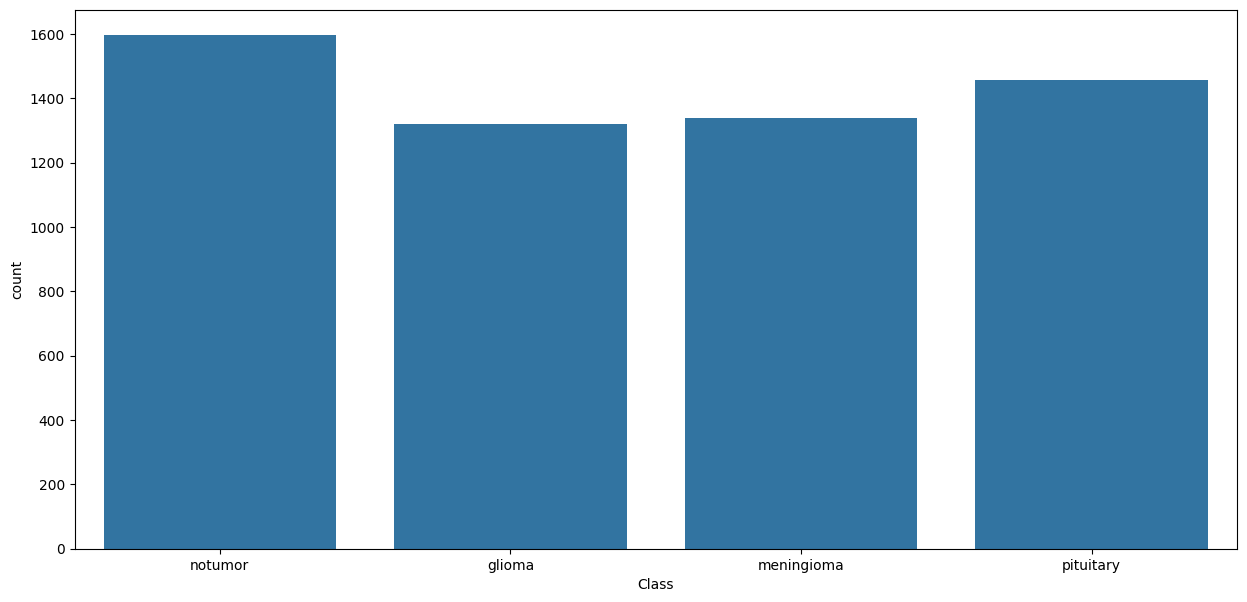

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=tr_df,x=tr_df['Class'])

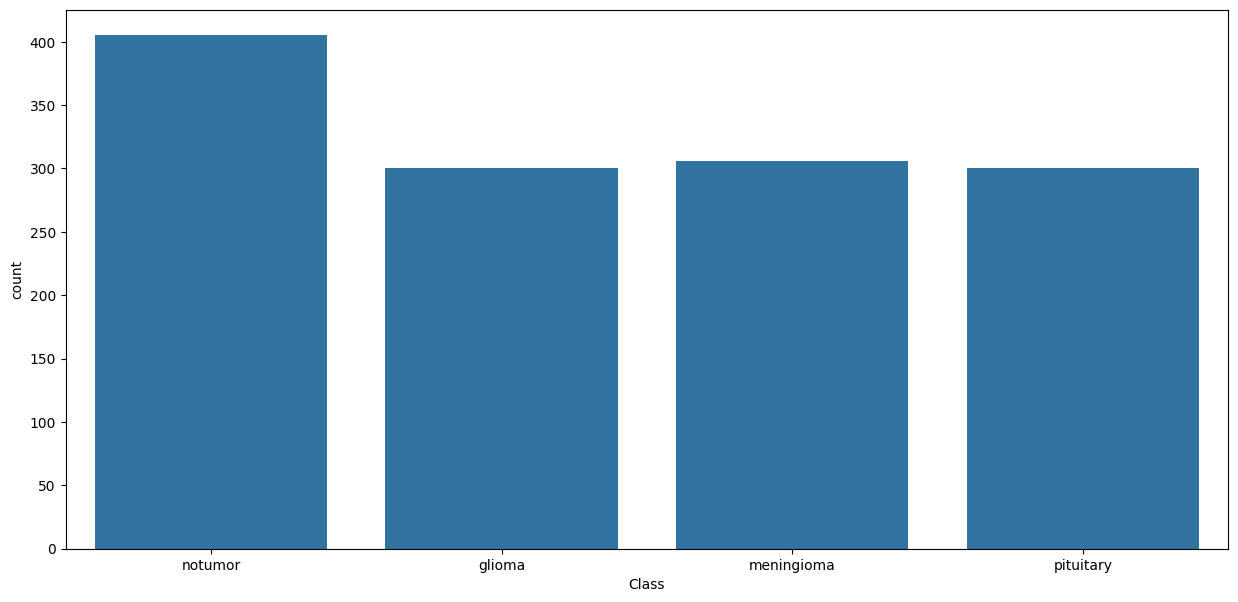

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=ts_df,x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df,ts_df=train_test_split(ts_df,train_size=0.5,stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
479,/content/Testing/glioma/Te-gl_0029.jpg,glioma
700,/content/Testing/glioma/Te-gl_0109.jpg,glioma
276,/content/Testing/notumor/Te-no_0311.jpg,notumor
529,/content/Testing/glioma/Te-gl_0145.jpg,glioma
57,/content/Testing/notumor/Te-no_0393.jpg,notumor
...,...,...
1035,/content/Testing/pituitary/Te-pi_0254.jpg,pituitary
619,/content/Testing/glioma/Te-gl_0036.jpg,glioma
1165,/content/Testing/pituitary/Te-pi_0151.jpg,pituitary
367,/content/Testing/notumor/Te-no_0371.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
858,/content/Testing/meningioma/Te-me_0261.jpg,meningioma
495,/content/Testing/glioma/Te-gl_0092.jpg,glioma
422,/content/Testing/glioma/Te-gl_0221.jpg,glioma
1135,/content/Testing/pituitary/Te-pi_0081.jpg,pituitary
350,/content/Testing/notumor/Te-no_0155.jpg,notumor
...,...,...
449,/content/Testing/glioma/Te-gl_0113.jpg,glioma
198,/content/Testing/notumor/Te-no_0055.jpg,notumor
1161,/content/Testing/pituitary/Te-pi_0261.jpg,pituitary
952,/content/Testing/meningioma/Te-me_0246.jpg,meningioma


In [ ]:
batch_size=32

img_size=(299,299)

image_generator=ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen=ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen=image_generator.flow_from_dataframe(tr_df,x_col='Class Path',
                                           y_col='Class',
                                           batch_size=batch_size,
                                           target_size=img_size)
valid_gen=image_generator.flow_from_dataframe(valid_df,x_col='Class Path',
                                           y_col='Class',
                                           batch_size=batch_size,
                                           target_size=img_size)
ts_gen=image_generator.flow_from_dataframe(ts_df,x_col='Class Path',
                                           y_col='Class',
                                           batch_size=batch_size,
                                           target_size=img_size,shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


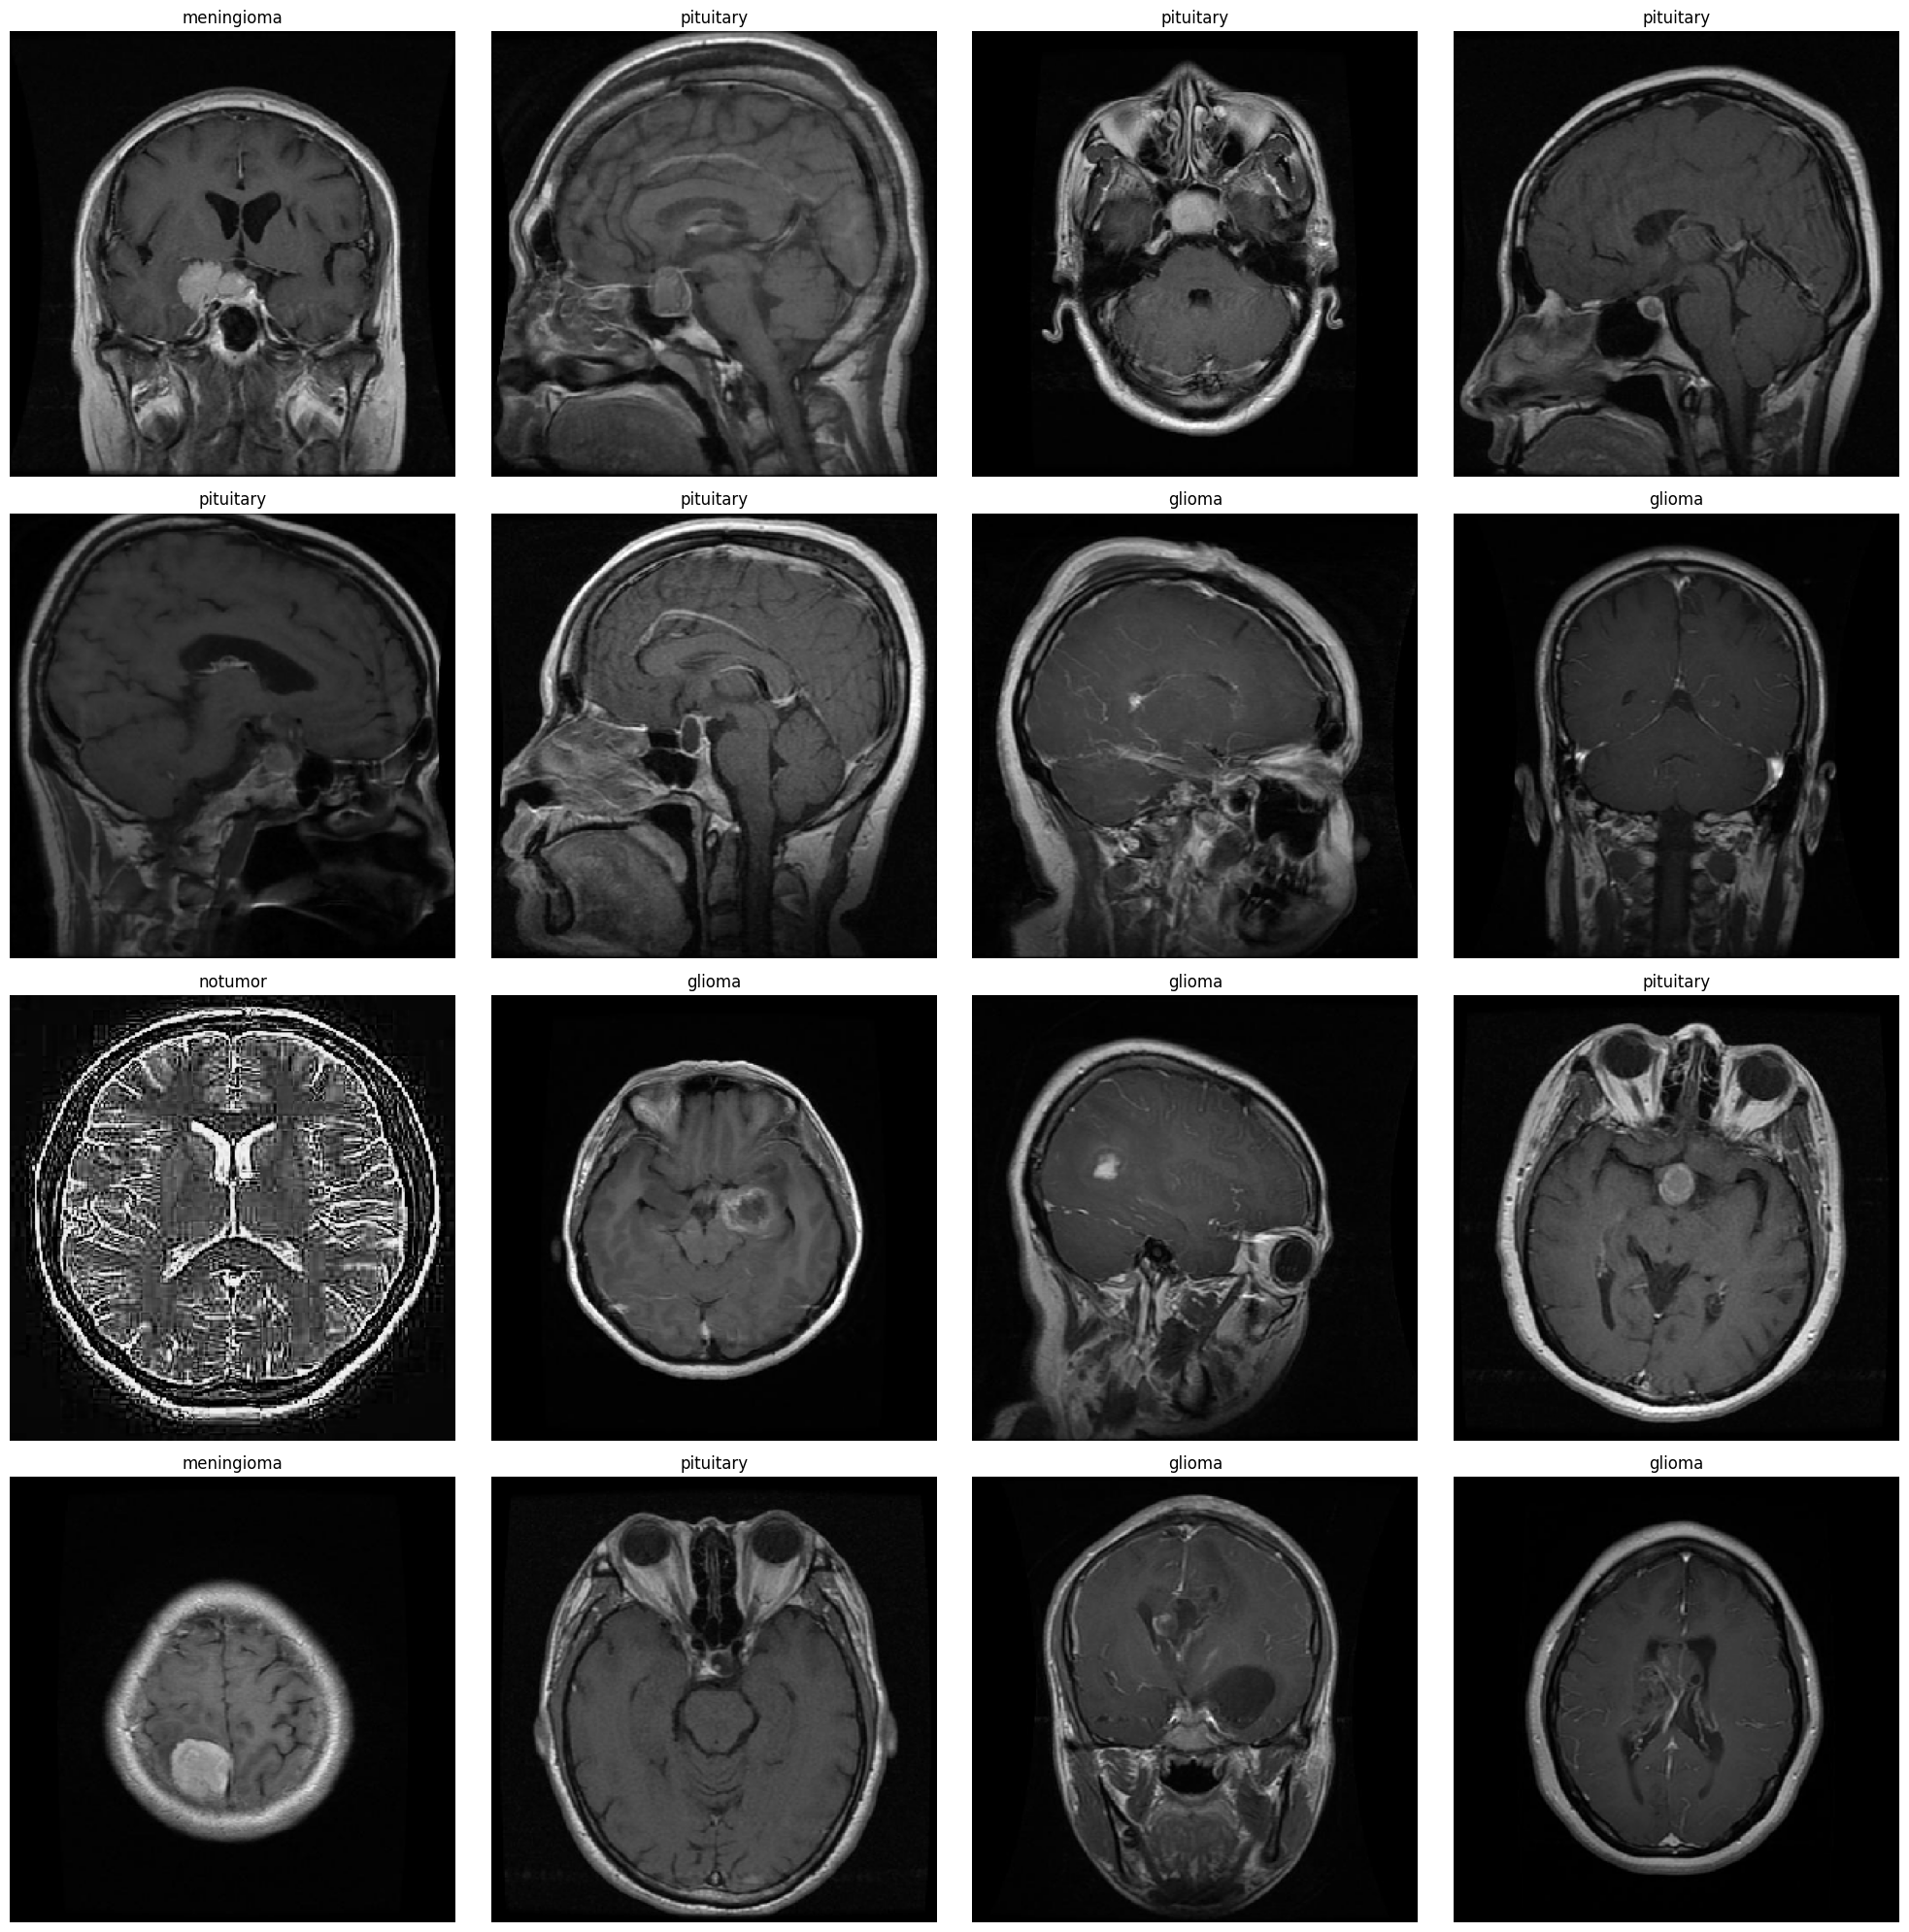

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch=next(tr_gen)
    image=batch[0][0]
    label=batch[1][0]
    plt.imshow(image)

    #Get the class index
    class_index=np.argmax(label)

    #Get the list of class names and calss indices
    class_names=list(tr_gen.class_indices.keys())
    class_indices=list(tr_gen.class_indices.values())

    #Find the index of the class_index in the list of indices
    index_position=class_indices.index(class_index)

    #Get the class name using the index position
    class_name=class_names[index_position]

    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()
